In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vlade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data = pd.read_csv('yelp/train_en.txt', sep='\t')
data = data[['Sentence', 'Style']]

In [4]:
data['Tokens'] = data['Sentence'].apply(lambda x: word_tokenize(str(x).lower()))

In [5]:
all_tokens = [token for sublist in data['Tokens'] for token in sublist]
word_counts = Counter(all_tokens)
vocab = [w for w, c in word_counts.items() if c >= 15]

In [6]:
data['Tokens'] = data['Tokens'].apply(lambda tokens: [t for t in tokens if t in vocab])

In [7]:
def word_arithmetic(model, positive, negative=[]):
    vec = sum([model.wv[w] for w in positive]) - sum([model.wv[w] for w in negative])
    return model.wv.similar_by_vector(vec, topn=1)[0][0]

In [8]:
w2v_skipgram_100 = Word2Vec(sentences=data['Tokens'], vector_size=100, window=5, min_count=15, sg=1)

In [9]:
words_sg_100 = w2v_skipgram_100.wv.index_to_key[:50]
vectors_sg_100 = w2v_skipgram_100.wv[words_sg_100]
tsne = TSNE(n_components=2, random_state=42)
vec_2d = tsne.fit_transform(vectors_sg_100)

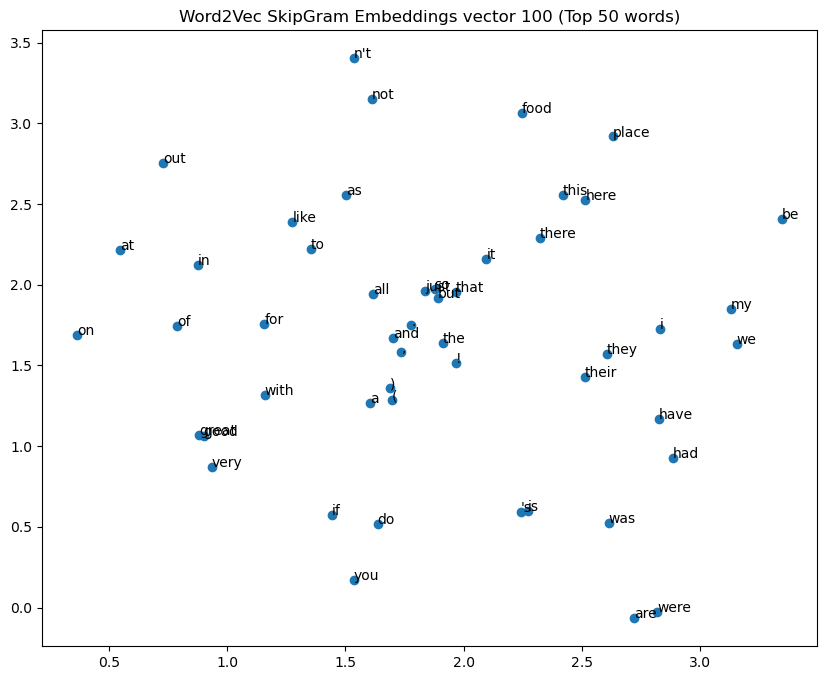

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(vec_2d[:,0], vec_2d[:,1])
for i, word in enumerate(words_sg_100):
    plt.annotate(word, xy=(vec_2d[i,0], vec_2d[i,1]))
plt.title("Word2Vec SkipGram Embeddings vector 100 (Top 50 words)")
plt.show()

In [11]:
print("Paris - France + Italy =", word_arithmetic(w2v_skipgram_100, ['italy','france'], ['paris']))
print("Madrid - Spain + France =", word_arithmetic(w2v_skipgram_100, ['france','spain'], ['madrid']))
print("King - Man + Woman =", word_arithmetic(w2v_skipgram_100, ['woman','man'], ['king']))
print("Bigger - Big + Cold =", word_arithmetic(w2v_skipgram_100, ['cold','big'], ['bigger']))
print("Windows - Microsoft + Google =", word_arithmetic(w2v_skipgram_100, ['google','microsoft'], ['windows']))

Paris - France + Italy = italy
Madrid - Spain + France = france
King - Man + Woman = woman
Bigger - Big + Cold = cold
Windows - Microsoft + Google = google


In [12]:
w2v_skipgram_200 = Word2Vec(sentences=data['Tokens'], vector_size=200, window=5, min_count=15, sg=1)

In [13]:
words_sg_200 = w2v_skipgram_200.wv.index_to_key[:50]
vectors_sg_200 = w2v_skipgram_200.wv[words_sg_200]
tsne = TSNE(n_components=2, random_state=42)
vec_2d = tsne.fit_transform(vectors_sg_200)

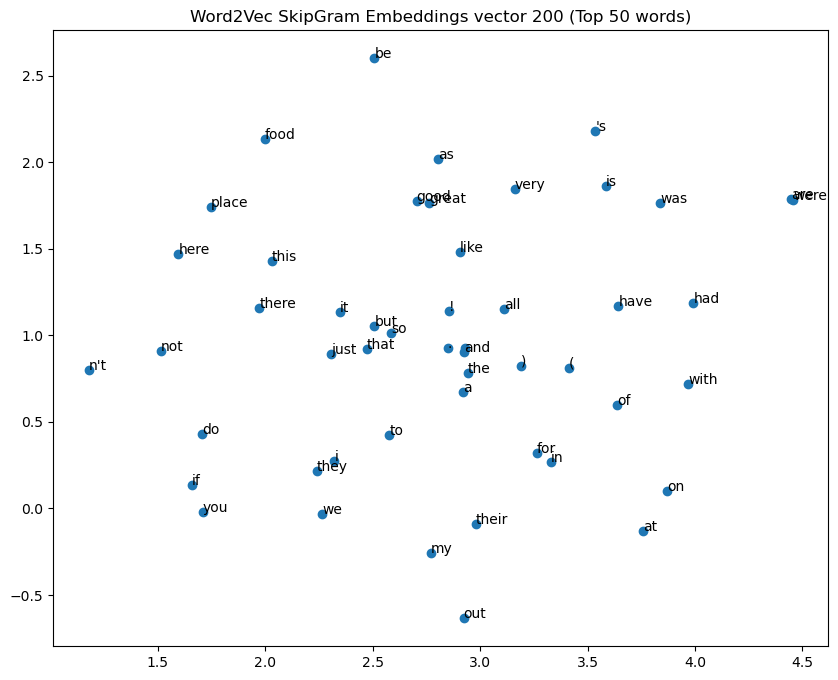

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(vec_2d[:,0], vec_2d[:,1])
for i, word in enumerate(words_sg_200):
    plt.annotate(word, xy=(vec_2d[i,0], vec_2d[i,1]))
plt.title("Word2Vec SkipGram Embeddings vector 200 (Top 50 words)")
plt.show()

In [15]:
print("Paris - France + Italy =", word_arithmetic(w2v_skipgram_200, ['italy','france'], ['paris']))
print("Madrid - Spain + France =", word_arithmetic(w2v_skipgram_200, ['france','spain'], ['madrid']))
print("King - Man + Woman =", word_arithmetic(w2v_skipgram_200, ['woman','man'], ['king']))
print("Bigger - Big + Cold =", word_arithmetic(w2v_skipgram_200, ['cold','big'], ['bigger']))
print("Windows - Microsoft + Google =", word_arithmetic(w2v_skipgram_200, ['google','microsoft'], ['windows']))

Paris - France + Italy = italy
Madrid - Spain + France = france
King - Man + Woman = woman
Bigger - Big + Cold = cold
Windows - Microsoft + Google = google


In [16]:
w2v_cbow_100 = Word2Vec(sentences=data['Tokens'], vector_size=100, window=5, min_count=15, sg=0)

In [17]:
words_cb_100 = w2v_cbow_100.wv.index_to_key[:50]
vectors_cb_100 = w2v_cbow_100.wv[words_cb_100]
tsne = TSNE(n_components=2, random_state=42)
vec_2d = tsne.fit_transform(vectors_cb_100)

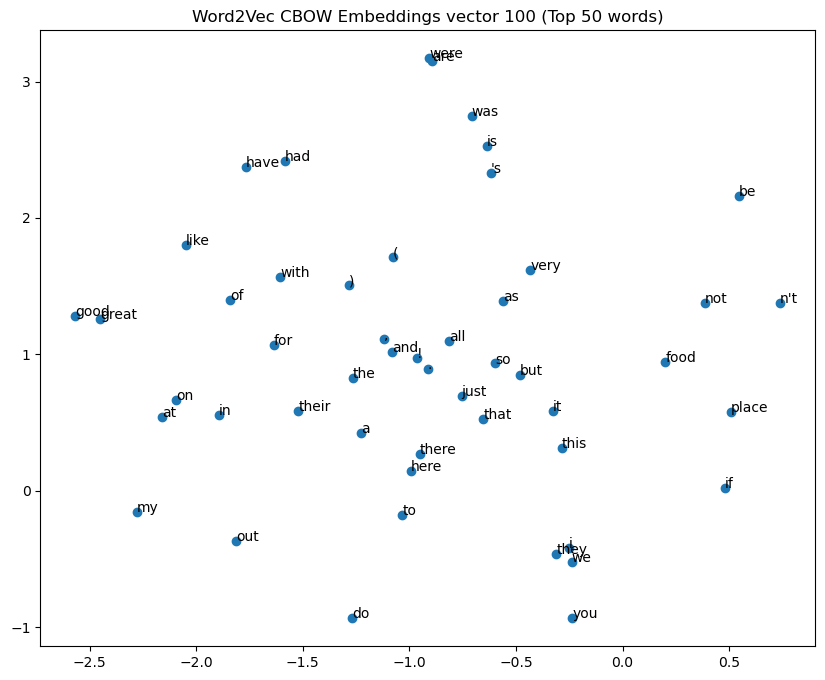

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(vec_2d[:,0], vec_2d[:,1])
for i, word in enumerate(words_cb_100):
    plt.annotate(word, xy=(vec_2d[i,0], vec_2d[i,1]))
plt.title("Word2Vec CBOW Embeddings vector 100 (Top 50 words)")
plt.show()

In [19]:
print("Paris - France + Italy =", word_arithmetic(w2v_cbow_100, ['italy','france'], ['paris']))
print("Madrid - Spain + France =", word_arithmetic(w2v_cbow_100, ['france','spain'], ['madrid']))
print("King - Man + Woman =", word_arithmetic(w2v_cbow_100, ['woman','man'], ['king']))
print("Bigger - Big + Cold =", word_arithmetic(w2v_cbow_100, ['cold','big'], ['bigger']))
print("Windows - Microsoft + Google =", word_arithmetic(w2v_cbow_100, ['google','microsoft'], ['windows']))

Paris - France + Italy = italy
Madrid - Spain + France = france
King - Man + Woman = woman
Bigger - Big + Cold = cold
Windows - Microsoft + Google = google


In [20]:
w2v_cbow_200 = Word2Vec(sentences=data['Tokens'], vector_size=200, window=5, min_count=15, sg=0)

In [21]:
words_cb_200 = w2v_cbow_200.wv.index_to_key[:50]
vectors_cb_200 = w2v_cbow_200.wv[words_cb_200]
tsne = TSNE(n_components=2, random_state=42)
vec_2d = tsne.fit_transform(vectors_cb_200)

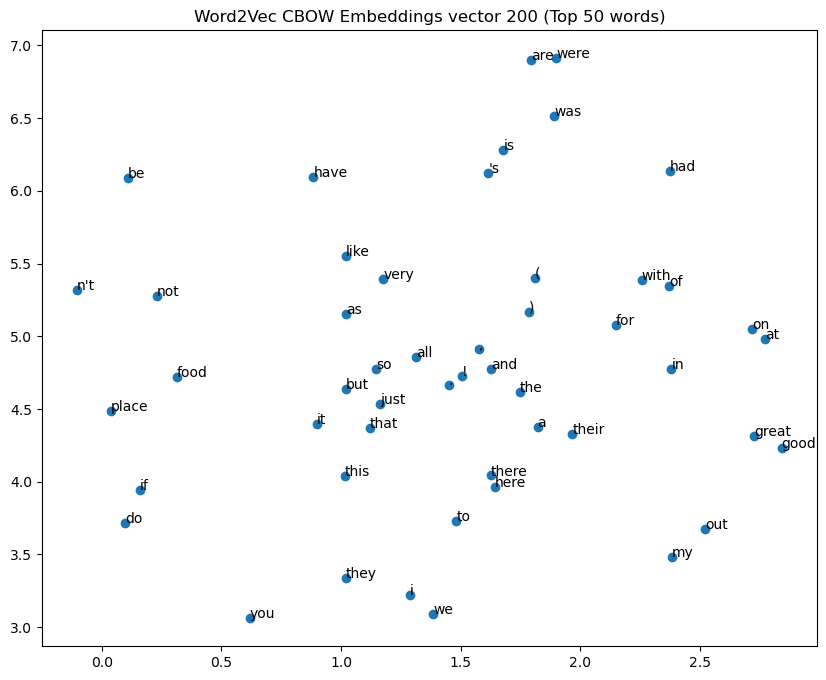

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(vec_2d[:,0], vec_2d[:,1])
for i, word in enumerate(words_cb_200):
    plt.annotate(word, xy=(vec_2d[i,0], vec_2d[i,1]))
plt.title("Word2Vec CBOW Embeddings vector 200 (Top 50 words)")
plt.show()

In [23]:
print("Paris - France + Italy =", word_arithmetic(w2v_cbow_200, ['italy','france'], ['paris']))
print("Madrid - Spain + France =", word_arithmetic(w2v_cbow_200, ['france','spain'], ['madrid']))
print("King - Man + Woman =", word_arithmetic(w2v_cbow_200, ['woman','man'], ['king']))
print("Bigger - Big + Cold =", word_arithmetic(w2v_cbow_200, ['cold','big'], ['bigger']))
print("Windows - Microsoft + Google =", word_arithmetic(w2v_cbow_200, ['google','microsoft'], ['windows']))

Paris - France + Italy = italy
Madrid - Spain + France = france
King - Man + Woman = woman
Bigger - Big + Cold = cold
Windows - Microsoft + Google = google


In [51]:
# Резултатите во сите 4 случаеви се исти